# Project 1

## 1: Demo specific functions

In [1]:
# Import from separate .py files
from ga import *
from p1 import *

In [2]:
# Set parameters

params_1 = {
        'indiv_len': 10,
        'pop_size': 8,              # Has to be even
        'num_parents':8,            # Has to be <= pop_size
        'p_m': 0.1,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 10, 
        'sine_constraint': False
    }

In [3]:
# DEMO init_pop()

algorithm_1 = GA(params_1, fitness=sine_fitness)
pop = algorithm_1.init_pop()
print(pop)

['1010101111', '0011111100', '0011111111', '1101011011', '0000001011', '0110011011', '0011101000', '0111110001']


In [4]:
# DEMO select_parents()

parents = algorithm_1.select_parents(pop)
print('\nParents selcted to make offsprings:\n', parents)


Parents selcted to make offsprings:
 ['1101011011', '0110011011', '0011111100', '0011101000', '1101011011', '0111110001', '0011111111', '0110011011']


In [5]:
# DEMO make_offsprings()

dummy_parents = ['11111', '00000', '11111', '00000', '11111', '00000', '11111', '00000']

# Crossover
crossover_offsprings = algorithm_1.crossover(dummy_parents)
print('Crossover:\n', crossover_offsprings)

# Mutation
mutation_offsprings = algorithm_1.mutate(dummy_parents)
print('\nMutation:\n', mutation_offsprings)

# Make offsprings
offsprings = algorithm_1.make_offsprings(dummy_parents)
print('\n\nA new generation:\n', offsprings)

Crossover:
 ['11100', '00011', '11000', '00111', '10000', '01111', '10000', '01111']

Mutation:
 ['01111', '00000', '01111', '01000', '01111', '00100', '01111', '00000']


A new generation:
 ['11000', '00111', '10000', '11111', '10000', '01111', '10010', '01111']


## 2: Demo GA - Sine [0, 128]

In [6]:
# DEMO run(), the complete GA with sine fitness function

params_2 = {
        'indiv_len': 15,
        'pop_size': 20,              # Has to be even
        'num_parents':20,            # Has to be <= pop_size
        'p_m': 0.05,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 50, 
        'sine_constraint': False
    }
algorithm_2 = GA(params_2, fitness=sine_fitness)
eval_log_2 = algorithm_2.run()

Algorithm succsessfully executed


In [7]:
# Generational data: population, real value, fitness value
gen_print = 10

for generation, data in eval_log_2.items():
    if generation % gen_print == 0:
        # 0: pop, 1: weights, 2: x-values, 3: fitness
        print('Generation:', generation, '\n')
        print('Population:', data[0], '\n')
        print('Population weights:', data[1], '\n')
        print('Population sine fitness value:', ['{:.2f}'.format(item) for item in data[3]], '\n\n')
        

Generation: 0 

Population: ['101000000001010', '101101111011001', '101000100101011', '010000001100101', '101100010001001', '100111000110101', '011011011100111', '111011000101101', '011010010100100', '101100111111001', '100101101011010', '110011101010111', '100011000010010', '001110001101110', '001101110000010', '101111010101011', '101011110101011', '010111100111110', '010111111100011', '010000010000000'] 

Population weights: [0.00000000e+00 1.53543231e-02 2.41356536e-02 8.71080475e-02
 7.33009781e-02 6.31259899e-02 1.39321945e-05 3.03661126e-03
 8.06178531e-02 9.07405008e-02 4.53282951e-02 6.31227785e-02
 8.64764953e-02 4.01754415e-02 8.06203007e-02 6.69998150e-02
 3.36171530e-02 4.19254343e-02 1.46107520e-02 8.96896451e-02] 

Population sine fitness value: ['-1.00', '-0.68', '-0.49', '0.83', '0.54', '0.33', '-1.00', '-0.93', '0.69', '0.91', '-0.05', '0.33', '0.82', '-0.15', '0.69', '0.41', '-0.29', '-0.12', '-0.69', '0.88'] 


Generation: 10 

Population: ['111111000111011', '111111

<IPython.core.display.Javascript object>


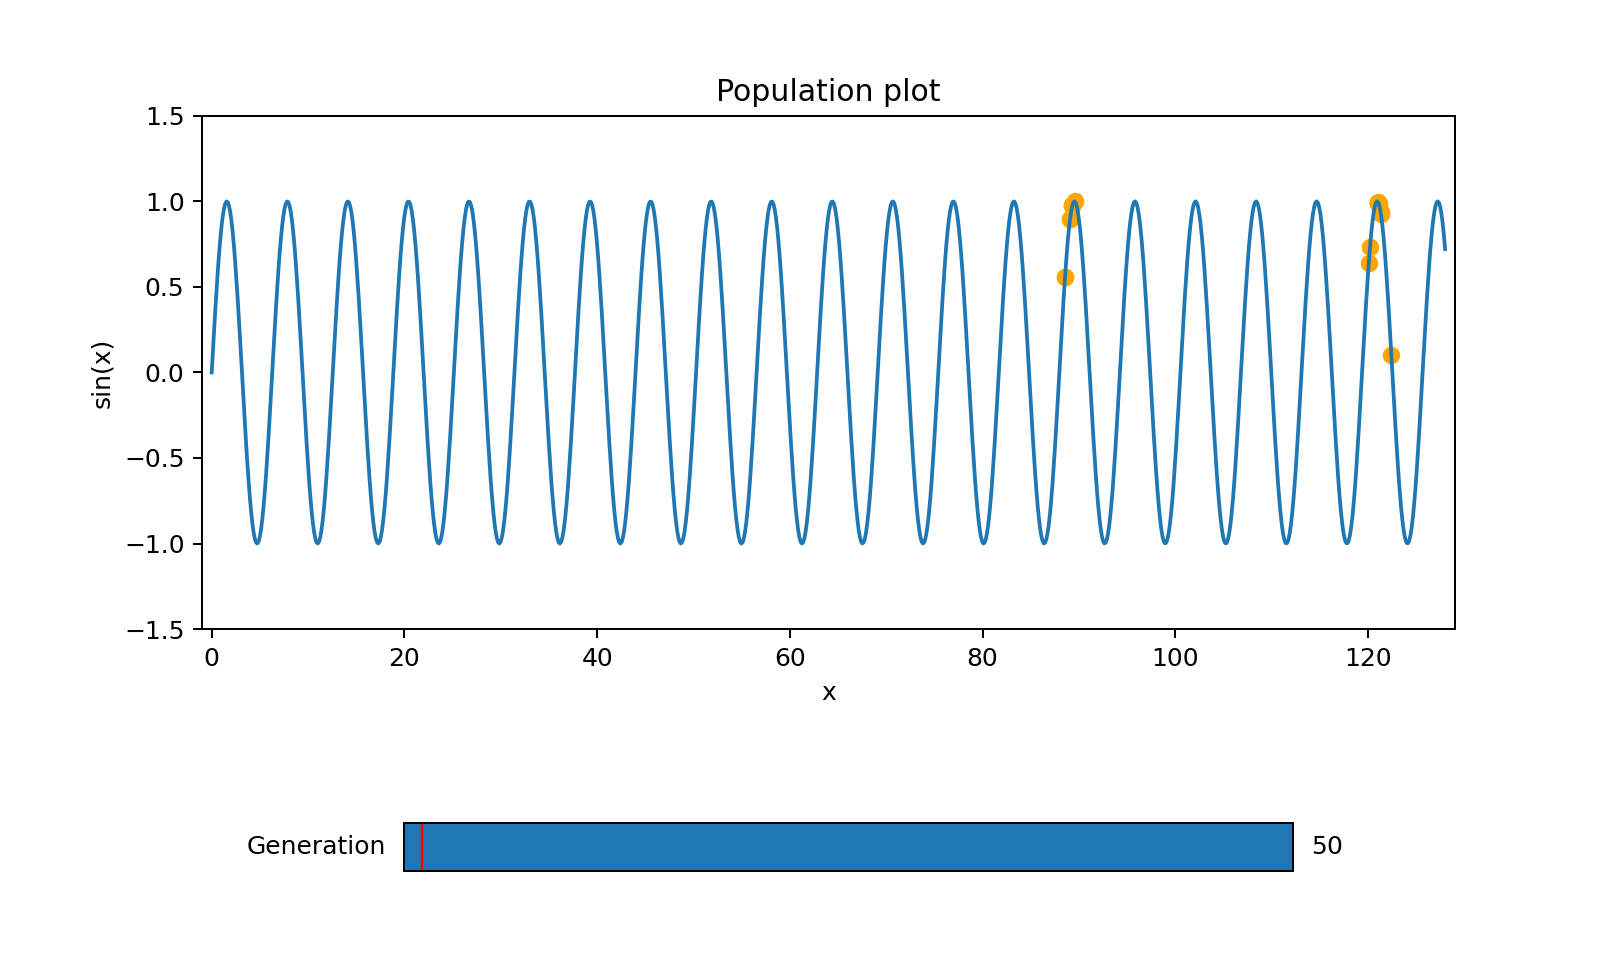

0

In [40]:
# Plot the population through the generations

%matplotlib notebook
from ipywidgets import *
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


DATA = eval_log_2

x_sine = np.linspace(0, 128, 1000)
y_sine = np.sin(x_sine)

fig, axs = plt.subplots(figsize=(5,3))
plt.subplots_adjust(bottom=0.35)
plt.title("Population plot")
plt.xlabel("x")
plt.ylabel("sin(x)");
plt.xlim(-1, 129)
plt.ylim(-1.5, 1.5)
line, = axs.plot(x_sine, y_sine)

i = 1
x = DATA[i][2]
y = DATA[i][3]

dots = axs.scatter(x, y, marker='o', color='orange')

ax = plt.axes([0.25, 0.1, 0.55, 0.05])
generation = Slider(ax, label='Generation', valmin=0, valmax=params_2['max_gen'], valstep=1, valinit=i)

def update(val):
    gen = generation.val
    dots.set_offsets(np.c_[DATA[gen][2], DATA[gen][3]])

generation.on_changed(update)


    


<IPython.core.display.Javascript object>


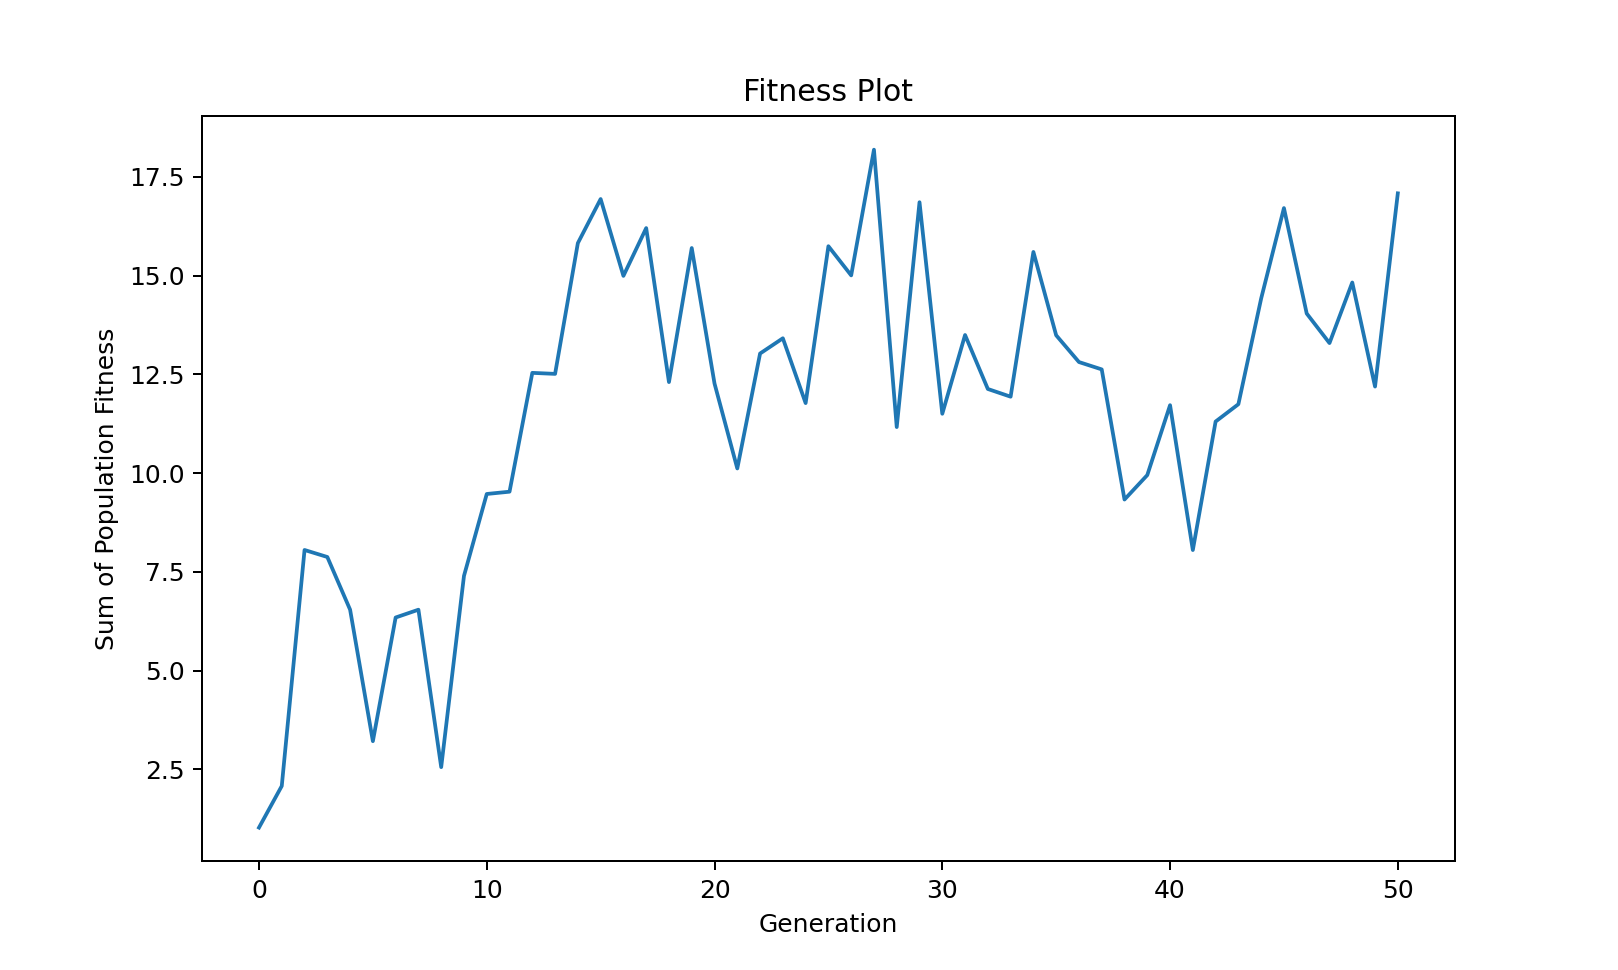

In [9]:
# Plot the fitness sum per generation

gen_fitness = [np.sum(eval_log_2[i][3]) for i in eval_log_2.keys()]

# Plot
fig, axs = plt.subplots(figsize=(5,3))
plt.title("Fitness Plot")
plt.xlabel("Generation")
plt.ylabel("Sum of Population Fitness");
axs.plot(gen_fitness)

## 3: Demo GA - Sine [0, 128] with [5, 10]-constraint

In [10]:
params_3 = {
        'indiv_len': 15,
        'pop_size': 20,              # Has to be even
        'num_parents':20,            # Has to be <= pop_size
        'p_m': 0.05,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 50, 
        'sine_constraint': True     # THIS ONE IS TRUE NOW
    }

algorithm_3 = GA(params_3, fitness=sine_fitness)
eval_log_3 = algorithm_3.run()


Algorithm succsessfully executed


In [11]:
# Generational data: population, real value, fitness value
gen_print = 10

for generation, data in eval_log_3.items():
    if generation % gen_print == 0:
        # 0: pop, 1: weights, 2: x-values, 3: fitness
        print('Generation:', generation, '\n')
        print('Population:', data[0], '\n')
        print('Population weights:', data[1], '\n')
        print('Population sine fitness value:', ['{:.2f}'.format(item) for item in data[3]], '\n\n')

Generation: 0 

Population: ['011101001101010', '111100111100011', '011010111011101', '011011100100101', '100110101011101', '011100110101111', '010101100101010', '100111111011111', '010000000110111', '110000001000100', '001110110000010', '111100111001101', '000010100010110', '111100101111111', '001111010000100', '110111011000011', '010010000011010', '000100000100000', '010000100010101', '100100001101000'] 

Population weights: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.12594934 0.         0.         0.         0.         0.87405066
 0.         0.        ] 

Population sine fitness value: ['-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-0.93', '-1.25', '-1.25', '-1.25', '-1.25', '0.96', '-1.25', '-1.25'] 


Generation: 10 

Population: ['000100011111001', '000100000001110', '000100100110101', '000100001110101', '000100000000011', '000100000100011', 

<IPython.core.display.Javascript object>


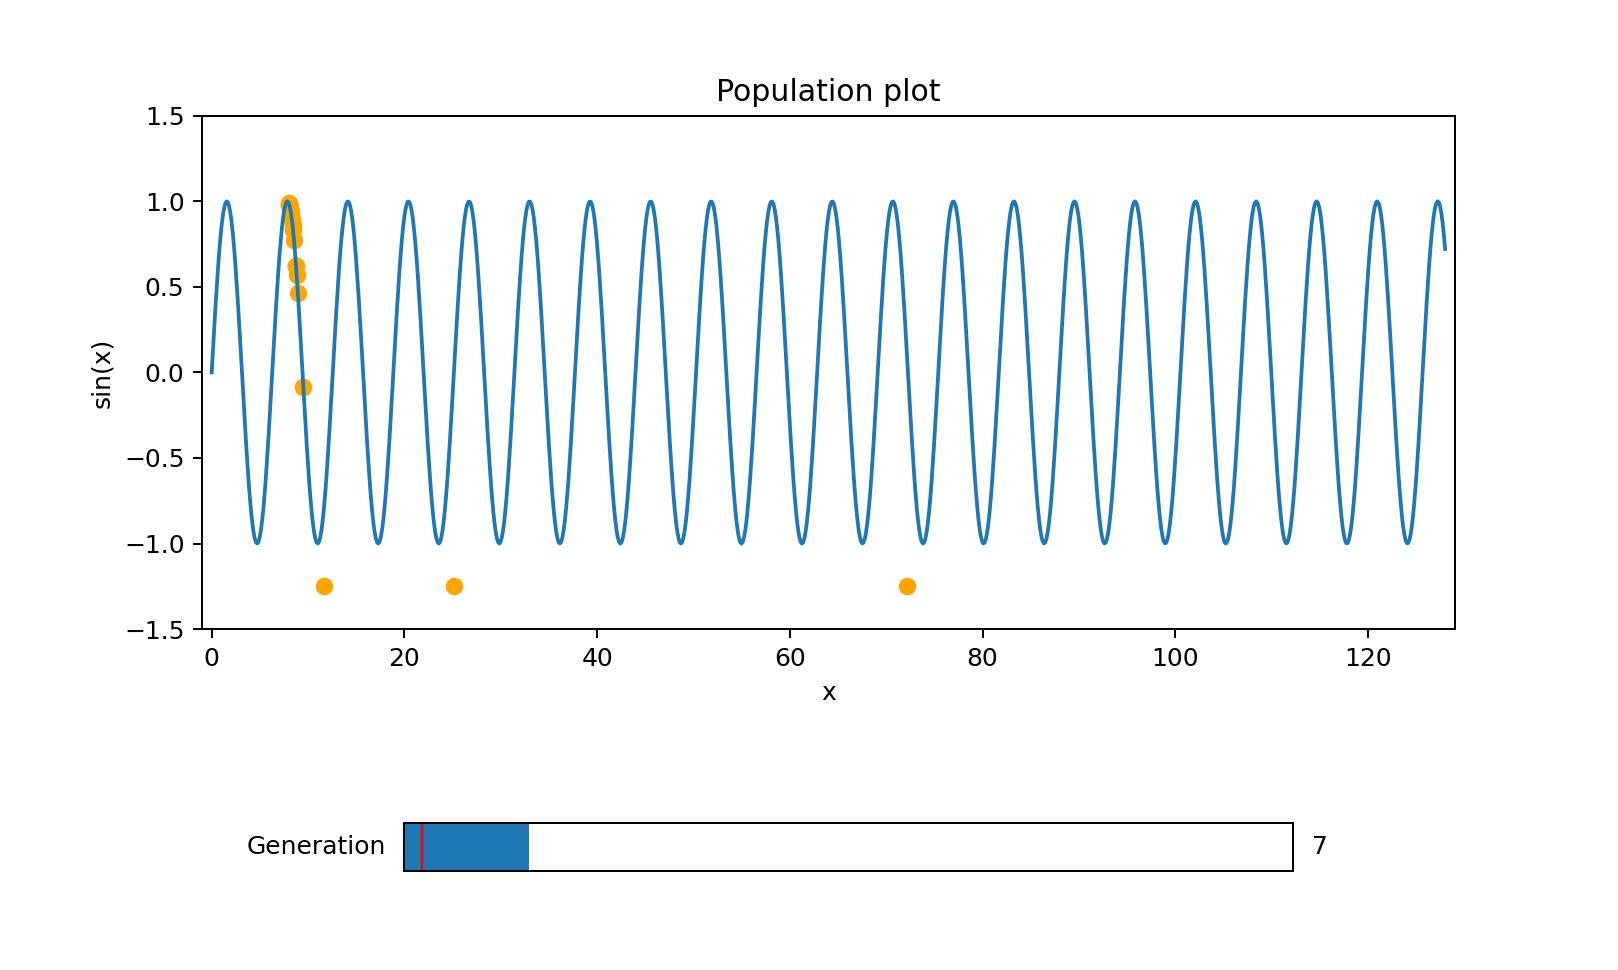

0

In [39]:
# Plot the generations

DATA = eval_log_3

x_sine = np.linspace(0, 128, 1000)
y_sine = np.sin(x_sine)

fig, axs = plt.subplots(figsize=(5,3))
plt.subplots_adjust(bottom=0.35)
plt.title("Population plot")
plt.xlabel("x")
plt.ylabel("sin(x)");
plt.xlim(-1, 129)
plt.ylim(-1.5, 1.5)
line, = axs.plot(x_sine, y_sine)

i = 1
x = DATA[i][2]
y = DATA[i][3]

dots = axs.scatter(x, y, marker='o', color='orange')

ax = plt.axes([0.25, 0.1, 0.55, 0.05])
generation = Slider(ax, label='Generation', valmin=0, valmax=params_3['max_gen'], valstep=1, valinit=i)

def update(val):
    gen = generation.val
    dots.set_offsets(np.c_[DATA[gen][2], DATA[gen][3]])

generation.on_changed(update)


<IPython.core.display.Javascript object>


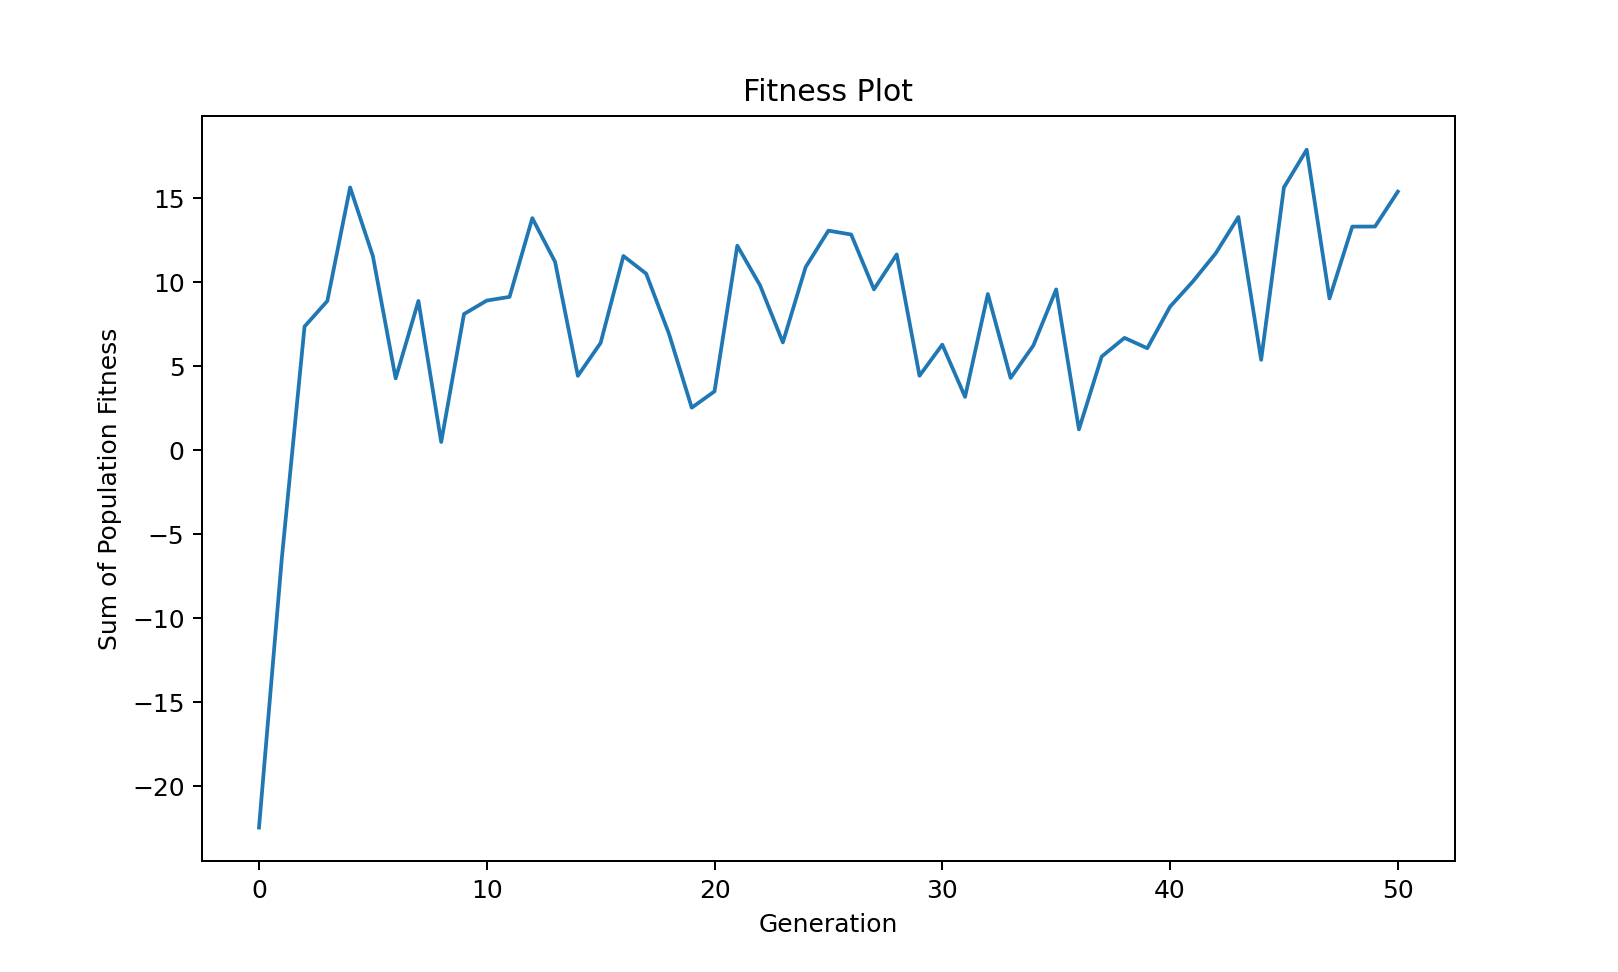

In [13]:
# Plot the fitness sum per generation

gen_fitness = [np.sum(eval_log_3[i][3]) for i in eval_log_3.keys()]

# Plot
fig, axs = plt.subplots(figsize=(5,3))
plt.title("Fitness Plot")
plt.xlabel("Generation")
plt.ylabel("Sum of Population Fitness");
axs.plot(gen_fitness)

## 4: Demo GA - Feature selection

In [14]:
# View data set

data_df = pd.read_csv('data/data.csv', index_col=[0])
values_df = pd.read_csv('data/values.csv', index_col=[0])
display(data_df, values_df)

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,8.0,1.0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53.0,1.0,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24.0,1.0,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34.0,1.0,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42.0,1.0,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,28.0,10.0,0.02,0.41,1.00,0.21,0.02,0.01,0.54,0.57,...,0.01,0.75,0.57,0.74,0.71,0.03,0.17,0.02,0.00,0.19
1989,12.0,10.0,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1990,6.0,10.0,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.45
1991,9.0,10.0,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23


,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,6.0,10.0,0.2,0.78,0.14,0.46,0.24,0.77,0.5,0.62,...,0.68,0.5,0.34,0.35,0.68,0.11,0.3,0.05,1.0,0.48


In [32]:
params_4 = {
        'indiv_len': 102,
        'pop_size': 20,              # Has to be even
        'num_parents':20,            # Has to be <= pop_size
        'p_m': 0.05,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 40, 
        'sine_constraint': False
    }

algorithm_4 = GA(params_4, fitness=feature_fitness)

In [51]:
# RMSE Error Without Feature Selection
import LinReg


linreg = LinReg.LinReg()
feats = values_df.to_numpy().shape[1]
x = data_df.to_numpy().reshape(feats, data_df.to_numpy().shape[0])
y = values_df.to_numpy().reshape(feats, 1)
error = linreg.get_fitness(x, y)

print('Error without feture selection:', error)
    

Error without feture selection: 1.1948934351036553


In [45]:
eval_log_4 = algorithm_4.run()

Algorithm succsessfully executed


In [46]:
# Generational data: population, real value, fitness value
gen_print = 10

for generation, data in eval_log_4.items():
    if generation % gen_print == 0:
        # 0: pop, 1: weights, 2: x-values, 3: fitness
        print('Generation', generation, ':\n')
        print('Population:', data[0], '\n')
        print('Population weights:', data[1], '\n')
        print('Population RMSE error:', ['{:.3f}'.format(item) for item in data[3]], '\n\n')

Generation 0 :

Population: ['100111111111110011011010110000110110111010000101011111011101110110101101110101001001000110011110000000', '101101110111011001001010010001110110101011100101101100000011000101001001000100111100000010100100010000', '101010101001101010111000111011000000111111111011101110110001100001100100110000001101111111010101110000', '011001011011011111111011110100011000011001011001001000101011001100001100111110101110100101000111110000', '111101001100010101000011001000011011100100010110011111011110111110110100000111110100101100100110011001', '011101111011001111101111001100010001001000001000100111100000110010110001100010101111111010001111000011', '001100000011010011011100011101001000111011101010110111101011100110011010010100111111000001111000001010', '110001000010001010111000101000001010101111011000101011010000110111110100111000111010101101110000101111', '000010111110110011101110110111101110011110110110011101110111011011111110111100100101011110010110001000', '0001110110101100

<IPython.core.display.Javascript object>


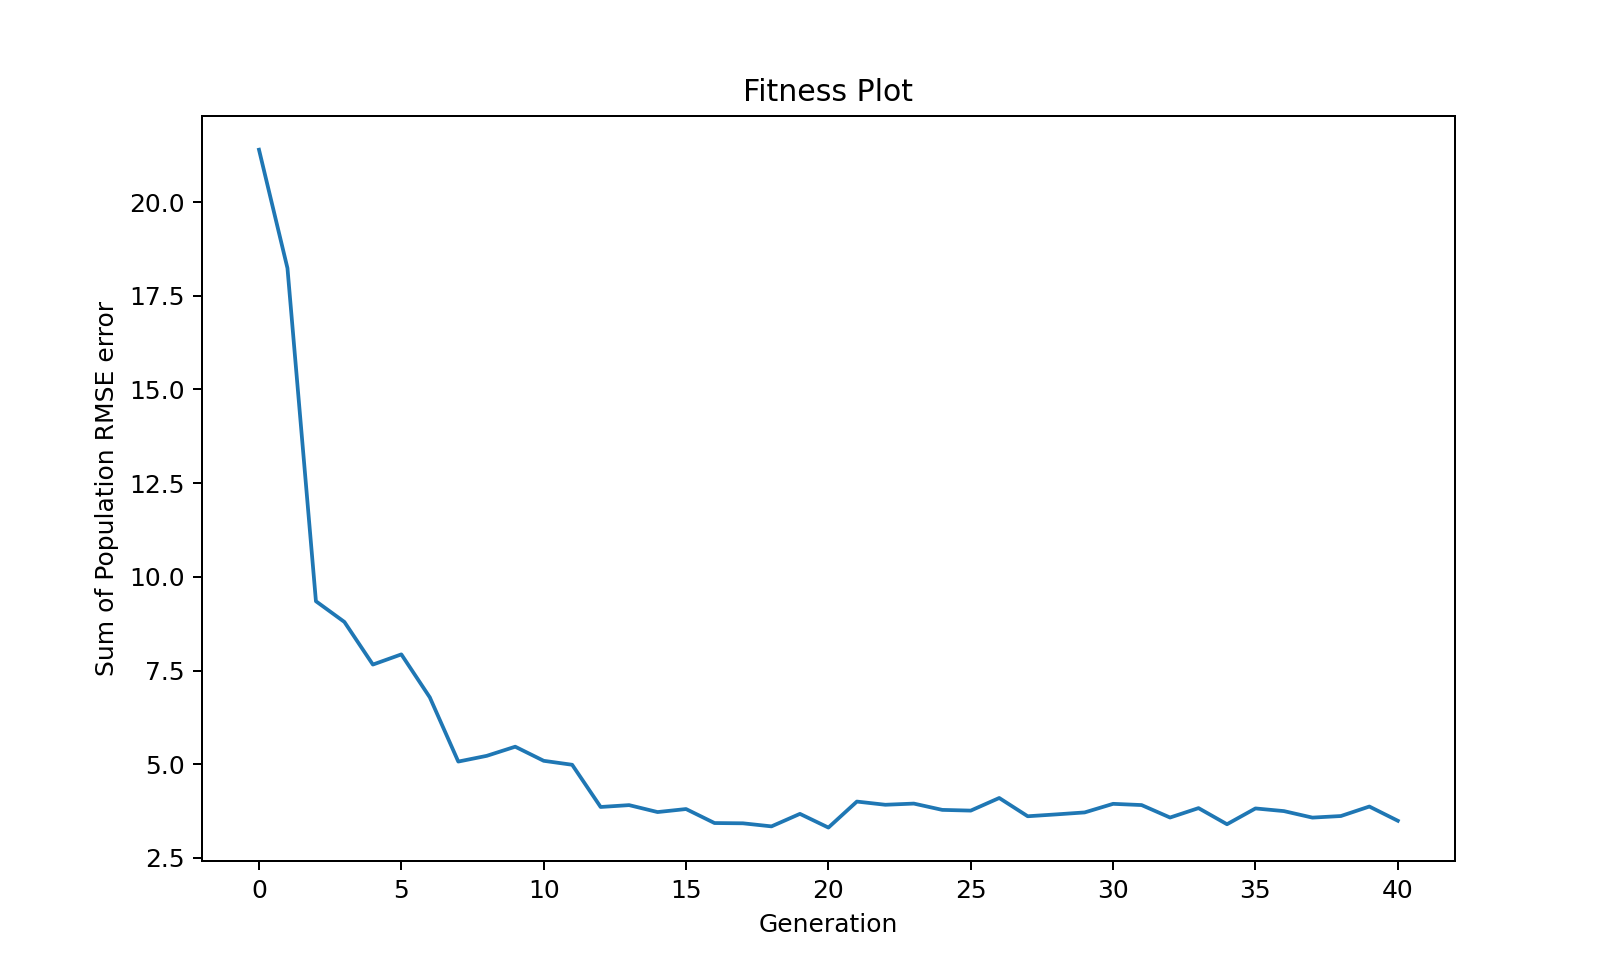

In [47]:
# Plot the fitness sum per generation

gen_fitness = [np.sum(eval_log_4[i][3]) for i in eval_log_4.keys()]

# Plot
fig, axs = plt.subplots(figsize=(5,3))
plt.title("Fitness Plot")
plt.xlabel("Generation")
plt.ylabel("Sum of Population RMSE error");
axs.plot(gen_fitness)



In [64]:
# Print key measures
print('Last 10 generation average: min, mean, medidan:')
min_list = [min(eval_log_4[i][3]) for i in list(eval_log_4.keys())[-10:]]
mean_list = [np.mean(eval_log_4[i][3]) for i in list(eval_log_4.keys())[-10:]]
median_list = [np.median(eval_log_4[i][3]) for i in list(eval_log_4.keys())[-10:]]

print(['{:.3f}'.format(item) for item in [np.mean(min_list), np.mean(mean_list), np.mean(median_list)]], '\n')
min_list.sort()
print('Five fittest individuals:', ['{:.3f}'.format(item) for item in min_list[:5]])

Last 10 generation average: min, mean, medidan:
['0.118', '0.184', '0.183'] 

Five fittest individuals: ['0.089', '0.095', '0.114', '0.116', '0.117']


In [61]:
min_dict = {eval_log_4[i][np.argmin(min(eval_log_4[i][3]))][3]:min(eval_log_4[i][3]) for i in list(eval_log_4.keys())[-10:]}
print('The best individuals from the last 10 generations:\n')
for key, value in min_dict.items():
    print(key, 'Fitness: {:.3f}'.format(value))


The best individuals from the last 10 generations:

000101111011001111101111101100010001001000001001101101100010110011100001100110101111101010001011100000 Fitness: 0.139
000101111011001111101111001100010001001000001001101101100010110010100101100110001111101000001011000100 Fitness: 0.132
000101111011001111101111001100010001001000001001101101100000100011100001100110101111101000000011100010 Fitness: 0.117
000101111011001111101111001100010001001000001001100101100010110001100001100110101011100110001001101010 Fitness: 0.114
000101111011001111101111001100010001001000001001101101100010110010000101101110001111101000001011010100 Fitness: 0.095
000101111011001111101111001100000001001000001001101101100000110011110011100110101111101001000011100010 Fitness: 0.120
000101111011001111101101001100010001001000001001100111100010110001100001100110101011100110001001101000 Fitness: 0.089
000100111011001111101111000100010001001000001001101101100000110011000001100110101011101011000001100000 Fitness: 0.116
0001

## 5: Demo GA - Sine [5, 10] with Crowding

In [ ]:
params_3 = {
        'indiv_len': 15,
        'pop_size': 20,              # Has to be even
        'num_parents':20,            # Has to be <= pop_size
        'p_m': 0.05,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 50, 
        'sine_constraint': True     # THIS ONE IS TRUE NOW
    }

algorithm_3 = GA(params_3, fitness=sine_fitness)
eval_log_3 = algorithm_3.run()


## 5: Demo GA - Feature selection with Crowding